# Correlation via 2D Histograms
* show density plot is necessary with to many data points

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr, gaussian_kde


### Utility functions

In [2]:
def create_2_fake_signals(duration=500, noise_level=1):
    """ Create two Sine with additional noise """
    time = np.linspace(0, 4*np.pi, duration)
    signal1 = np.sin(time)+np.random.rand(time.size) * noise_level
    signal2 = np.sin(time)+np.random.rand(time.size) * noise_level
    return time, signal1, signal2

def show_plots(time, signal1, signal2):
    """ Visualize correlation of two signals """
    
    fig1 = plt.figure()
    plt.plot(time, signal1,'.')
    plt.plot(time, signal2,'.')
    plt.xlabel("time [a.u.]")
    plt.ylabel("signal [a.u.]")
    plt.title("two sine with different noise")
    
    corr, _ = spearmanr(signal1, signal2)
    
    fig2 = plt.figure()
    plt.plot(signal1,signal2,'.')
    plt.xlabel("signal 1 [a.u.]")
    plt.ylabel("signal 2 [a.u.]")
    plt.title(f"scatter plot - coorelation: {corr:.3f}")
    
    fig3 = plt.figure()
    x, y, z = correlation_density(signal1, signal2, nbins=300)
    plt.pcolormesh(x,y,z)
    plt.xlabel("signal 1 [a.u.]")
    plt.ylabel("signal 2 [a.u.]")
    plt.title(f"2D histogram - correlation: {corr:.3f}")
    

def correlation_density(x, y, nbins = 300):
    X, Y = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
    positions = np.vstack([X.ravel(), Y.ravel()])
    values = np.vstack([x,y])
    kernel = gaussian_kde(values)
    Z = np.reshape(kernel(positions).T, X.shape)
    return X, Y, Z



## Correlate

* ### low noise level

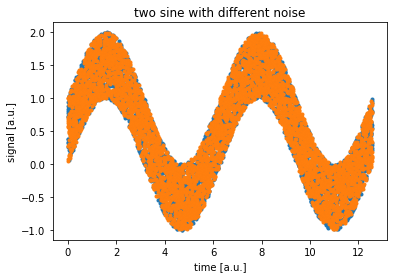

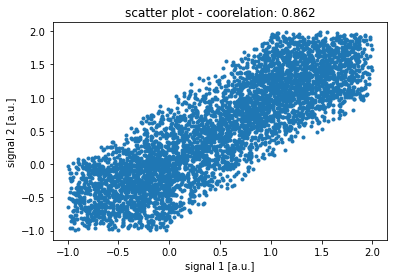

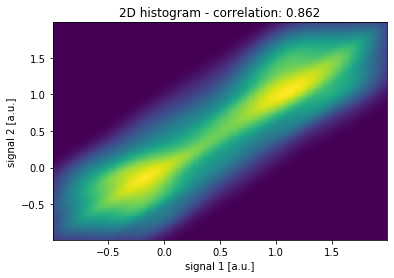

In [3]:
noise_level = 1
duration = 5000

time, singal1, signal2 = create_2_fake_signals(duration=duration, noise_level=noise_level)
show_plots(time, singal1, signal2)

* ### high noise level

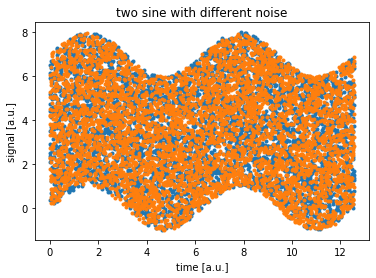

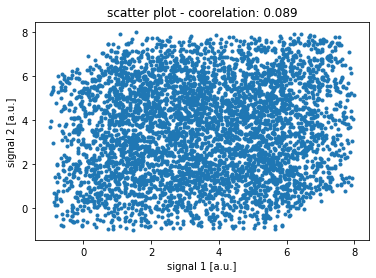

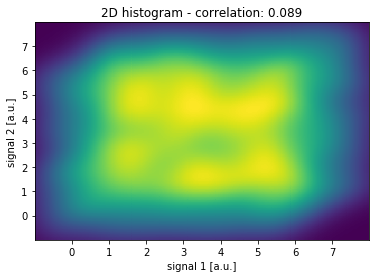

In [4]:
noise_level = 7
duration = 5000

time, singal1, signal2 = create_2_fake_signals(duration=duration, noise_level=noise_level)
show_plots(time, singal1, signal2)